In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importação do Dataset

+ b = Fração da população da Coréia estratificada por idade <br />
+ t = Fração da população do Pará estratificada dor idade <br />
+ ri = Taxa de letalidade do vírus na Coréia estratificada por idade

In [2]:
b = pd.read_csv('https://github.com/fellypesb/covid-19/raw/master/Dataset/populacao_coreia.csv',nrows=9, usecols=[1])
t = pd.read_csv('https://github.com/fellypesb/covid-19/raw/master/Dataset/populacao_para.csv',nrows=9, usecols=[1])
ri = pd.read_csv('https://github.com/fellypesb/covid-19/raw/master/Dataset/casos_idades_coreia.csv',nrows=9, usecols=[3])
casos_para = pd.read_csv('https://github.com/fellypesb/covid-19/raw/master/Dataset/casos_diarios_para.csv')

In [3]:
# retira unidade(%) da taxa de letalidade da coréia
ri = [i/100 for i in ri['Letalidade']]

# Ajuste de diferença demográfica
Para ajustar a diferença na demografia populacional do local de destino, t, e do local de referência, b, calcula-se um Fator de vulnerabilidade (v_tb). O cálculo empreegado é detalhado [aqui](https://ciis.fmrp.usp.br/covid19/estimativa-de-populacao-infectada/)


In [4]:
fti = 0
fbi = 0
for t,r in zip(t.values, ri):
    fti += (t*r)

for b,r in zip(b.values, ri):
    fbi += (b*r)

v_tb = (fti/fbi) # Fator de vunerabilidade
print('Fração Para:',fti,'Fração Coreia:',fbi,'Fator Vunerabilidade',v_tb)

Fração Para: [71171.34289589] Fração Coreia: [1007327.92900856] Fator Vunerabilidade [0.0706536]


# Ajuste da população infectada
Considerando que existe um deslocamento no tempo de número de casos confirmados em relação ao número de óbitos acumulados (neste estudo considerado 10 dias)

In [5]:
obitos = casos_para['Obitos']
obitos = obitos[10:] # delay de 10 dias
ajust = []
crf_b = 2.324504538 # Taxa de letalidade coreia
for i in obitos.values:
    x = i/(v_tb*crf_b)
    ajust.append(x)
ajust = np.ceil(ajust) # Arredondamento para baixo
len(ajust)

45

In [6]:
casos_para = casos_para[:len(casos_para)-10]
casos_para['Ajuste'] = ajust

# Metodologia USP
Nota-se que letalidade continuou alta e de grande amplitude

In [7]:
casos_para['Letalidade2'] = (casos_para['Obitos'] / casos_para['Ajuste'])*100

In [8]:
datas =pd.date_range('03 17 2020', periods=len(casos_para), freq='D')
datas_ = []
for i in range(0,len(casos_para),4):
    datas_.append(datas[i])
    #print(datas[i])

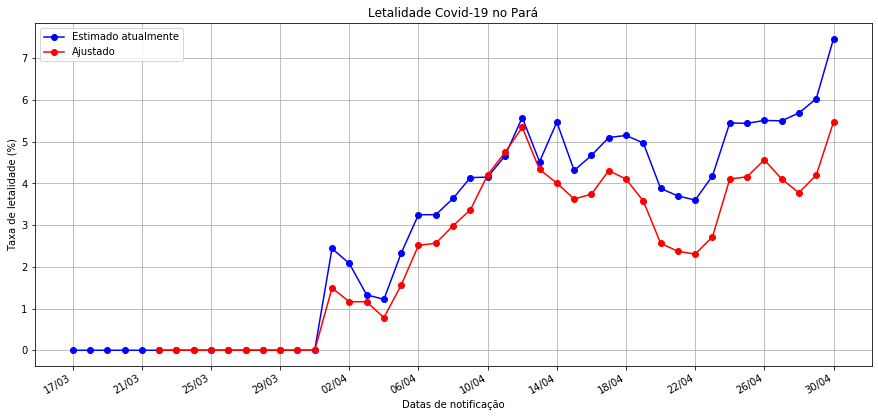

In [9]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Letalidade Covid-19 no Pará')
plt.plot_date(x=datas, y=casos_para['Letalidade'], label='Estimado atualmente', fmt='b-o')
plt.plot_date(x=datas, y=casos_para['Letalidade2'], label='Ajustado', fmt='r-o')
plt.xlabel('Datas de notificação')
plt.ylabel('Taxa de letalidade (%)')
plt.xticks(datas_)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%d/%m')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.grid(True)
plt.legend()
plt.show()

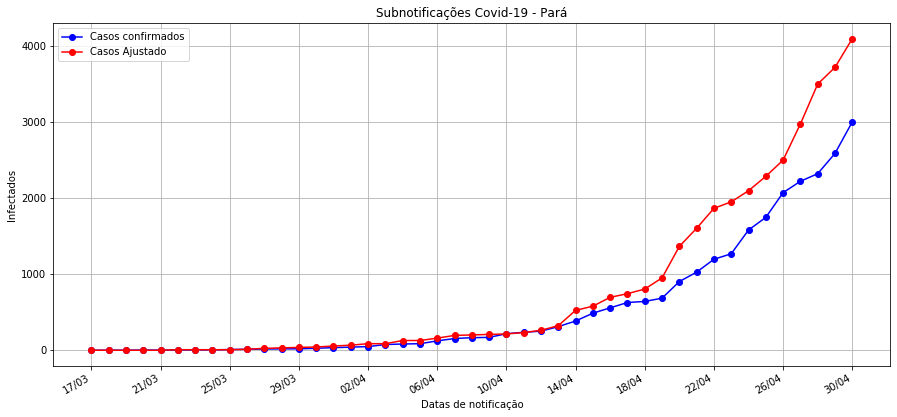

In [10]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Subnotificações Covid-19 - Pará')
plt.plot_date(x=datas, y=casos_para['Casos_total'], label='Casos confirmados', fmt='b-o')
plt.plot_date(x=datas, y=casos_para['Ajuste'], label='Casos Ajustado', fmt='r-o')
plt.xlabel('Datas de notificação')
plt.ylabel('Infectados')
plt.xticks(datas_)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%d/%m')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.grid(True)
plt.legend()
plt.show()

# Metodologia USP adaptada
O novo ajuste é calculado somando os casos confirmados e casos ajustados. Neste caso nota-se uma significativa diminuição na letalidade é índices mais próximos do local de referência Coréia do Sul

In [11]:
casos_para['Ajuste2'] = casos_para['Casos_total'] + casos_para['Ajuste']
casos_para['Letalidade3'] = (casos_para['Obitos']/casos_para['Ajuste2'])*100

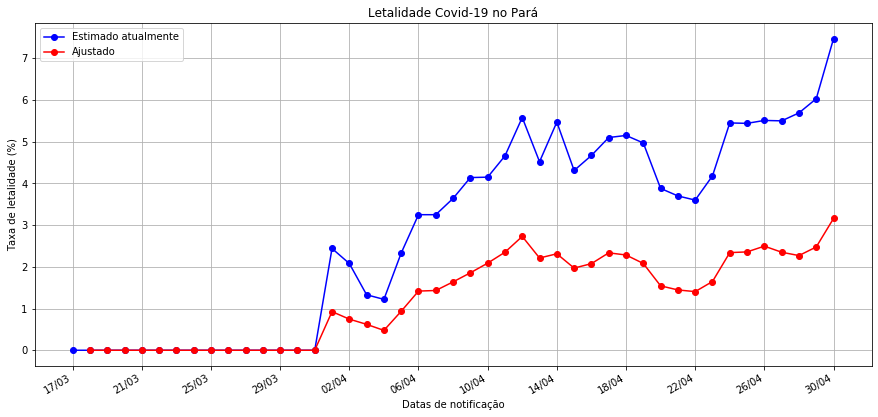

In [12]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Letalidade Covid-19 no Pará')
plt.plot_date(x=datas, y=casos_para['Letalidade'], label='Estimado atualmente', fmt='b-o')
plt.plot_date(x=datas, y=casos_para['Letalidade3'], label='Ajustado', fmt='r-o')
plt.xlabel('Datas de notificação')
plt.ylabel('Taxa de letalidade (%)')
plt.xticks(datas_)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%d/%m')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.grid(True)
plt.legend()
plt.show()

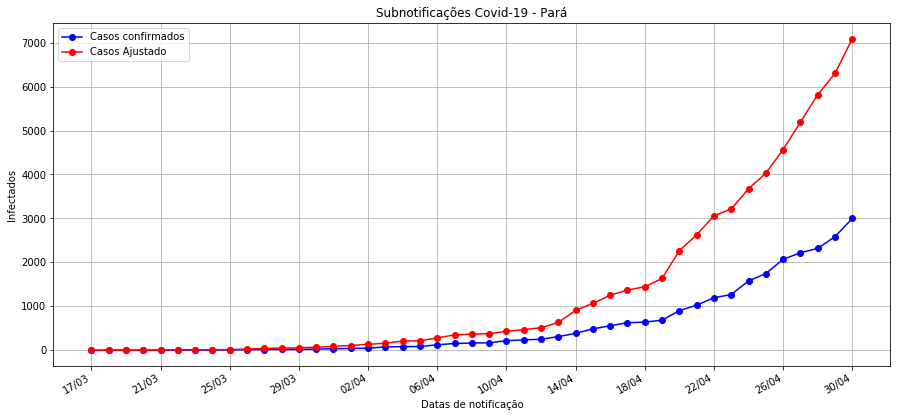

In [13]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Subnotificações Covid-19 - Pará')
plt.plot_date(x=datas, y=casos_para['Casos_total'], label='Casos confirmados', fmt='b-o')
plt.plot_date(x=datas, y=casos_para['Ajuste2'], label='Casos Ajustado', fmt='r-o')
plt.xlabel('Datas de notificação')
plt.ylabel('Infectados')
plt.xticks(datas_)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%d/%m')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.grid(True)
plt.legend()
plt.show()